# Model Evaluation

## Regression

### Review: R^2

- "Coefficient of determination"
- Percentage of variation in y that the model captures
- range from 0 to 1 (higher is better)
- `LinearRegression().score()`
- Limitations:
    - May not accurately measure performance of complicated models
    - Assumes errors are Gaussian

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
np.random.seed(42)

In [2]:
linear = pd.DataFrame({
    'actual': [99, 202, 294, 410, 487],
    'predicted': [100, 200, 300, 400, 500]
})
linear

,actual,predicted
0,99,100
1,202,200
2,294,300
3,410,400
4,487,500


### r2_score

In [3]:
from sklearn.metrics import r2_score

r2_score(linear['actual'], linear['predicted'])

0.9968073229712082

In [5]:
linear['sq_error'] = (linear['actual'] - linear['predicted'])**2 #AKA Residuals

linear['sq_diff_mean'] = (linear['actual'] - linear['actual'].mean())**2

linear.head()

,actual,predicted,sq_error,sq_diff_mean
0,99,100,1,39760.36
1,202,200,4,9292.96
2,294,300,36,19.36
3,410,400,100,12454.56
4,487,500,169,35569.96


In [7]:
# R^2 = (1 / u/v)

u = linear['sq_error'].sum()
v = linear['sq_diff_mean'].sum()

r2 = 1 - (u/v)
r2

0.9968073229712082

### Review: MSE

- Mean Squared Error
- Takes the error between each predicted and actual value, square it, then calculates the average (mean) error

In [48]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(linear['actual'], linear['predicted'])
mse

62.0

### Review: RMSE

In [49]:
from math import sqrt
sqrt(mse)

7.874007874011811

### `mean_absolute_error`

- average of the absolute value of the errors between predicted and actual values
- less affected by individual large outlier errors
- less efficient to compute on large datasets

In [8]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(linear['actual'], linear['predicted'])

6.4

In [9]:
abs(-10)

10

In [10]:
abs(linear['actual'] - linear['predicted']).mean()

6.4

## Classification

In [12]:
classifier = pd.DataFrame({
    'actual': ['A', 'A', 'B', 'B', 'A'],
    'predicted': ['A', 'A', 'B', 'B', 'B']
})

classifier['correct'] = classifier['actual'] == classifier['predicted']
classifier

,actual,predicted,correct
0,A,A,True
1,A,A,True
2,B,B,True
3,B,B,True
4,A,B,False


### `accuracy_score`

- `model.score()`
- Calculates percent of accurate predictions
- Easy to understand
- Can be skewed when classes are unbalanced

In [13]:
from sklearn.metrics import accuracy_score

accuracy_score(classifier['actual'], classifier['predicted'])

0.8

### `balanced_accuracy_score`
- weighs accuracy proportionate to class balance

In [15]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(classifier['actual'], classifier['predicted'])

0.8333333333333333

### Review: `confusion_matrix`

In [18]:
from sklearn.metrics import confusion_matrix

confusion = pd.DataFrame(
    data = confusion_matrix(classifier['actual'], classifier['predicted']),
    columns = ['Actual A', 'Actual B'],
    index = ['Predicted A', 'Predicted B']
)
confusion

,Actual A,Actual B
Predicted A,2,1
Predicted B,0,2


### `presicion_score`

- Precision measures how well the classifier predicts a given class

In [20]:
from sklearn.metrics import precision_score

precision = precision_score(
    classifier['actual'],
    classifier['predicted'],
    pos_label = 'A'
)

precision

1.0

### `recall_score`

- Recall measures how well the classifier identifies all instances of a given class

In [21]:
from sklearn.metrics import recall_score

recall = recall_score(
    classifier['actual'],
    classifier['predicted'],
    pos_label = 'A'
)

recall

0.6666666666666666

### `f1_score`

- combines precision and recall into a single metric

In [25]:
from sklearn.metrics import f1_score

f1_score(
    classifier['actual'],
    classifier['predicted'],
    pos_label = 'A'
)

0.8

## Random Forest Classifiers

- Ensemble" algorithm (uses multiple decision trees)
- Randomly resamples the dataset multiple times ("bootstrapping") and generates a decision tree from each sample
- Uses only a random subset of columns at each step in the decision tree to separate the data
- Runs new observations down each tree and tallies the outcomes ("voting")
- Chooses algorithm based on the decision trees with the most aggregate votes ("bagging")

- Pros:
    - Versatile and easy to implement
    - Can be trained on small datasets
    - Can handle high dimensionality
    - Can handle null values
    - Competitive performance
    - No need for a test set
- Cons:
    - Large forests are computationally expensive
    - Very little control over model
    - Better at classification than regression
    
https://youtu.be/J4Wdy0Wc_xQ?t=64

In [26]:
pd.DataFrame({
    'chest_pain': [False, True, True, True],
    'good_ciculation': [False, True, True, False],
    'blocked_arteries': [False, True, False, True],
    'weight': [125, 180, 210, 167],
    'heart_disease': [False, True, False, True]
})

,chest_pain,good_ciculation,blocked_arteries,weight,heart_disease
0,False,False,False,125,False
1,True,True,True,180,True
2,True,True,False,210,False
3,True,False,True,167,True


In [28]:
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(
    pd.get_dummies(titanic[['sex', 'class', 'who', 'deck', 'alone']]),
    titanic['survived'],
    test_size = .2,
    random_state = 42
)

train_X.head()

,alone,sex_female,sex_male,class_First,class_Second,class_Third,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
331,True,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
733,True,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
382,True,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
704,False,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0
813,False,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100).fit(train_X, train_y)

predictions = rf.predict(test_X)
predictions

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [37]:
rf.score(test_X, test_y)

0.8044692737430168

In [40]:
pred_proba_y = rf.predict_proba(test_X)
pred_proba_y[:5]

array([[0.9135344 , 0.0864656 ],
       [0.91937175, 0.08062825],
       [0.86747948, 0.13252052],
       [0.        , 1.        ],
       [0.58110491, 0.41889509]])

### `roc_curve()`

- Receiver Operating Characteristic (ROC)
- ONLY WORKS WITH BINARY CLASSIFIERS!

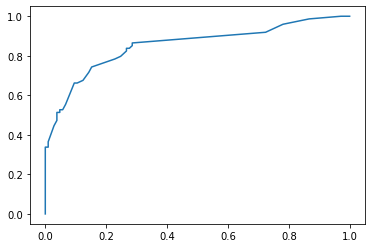

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

false_pos_rates, true_pos_rates, _ = roc_curve(test_y, pred_proba_y[:,1])
plt.plot(false_pos_rates, true_pos_rates)

### `roc_auc_score`

- Computes percentage of area under the ROC curve (0 to 1)

In [44]:
auc = roc_auc_score(test_y, pred_proba_y[:,1])
auc

0.8521235521235521